In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv('HousingData.csv')

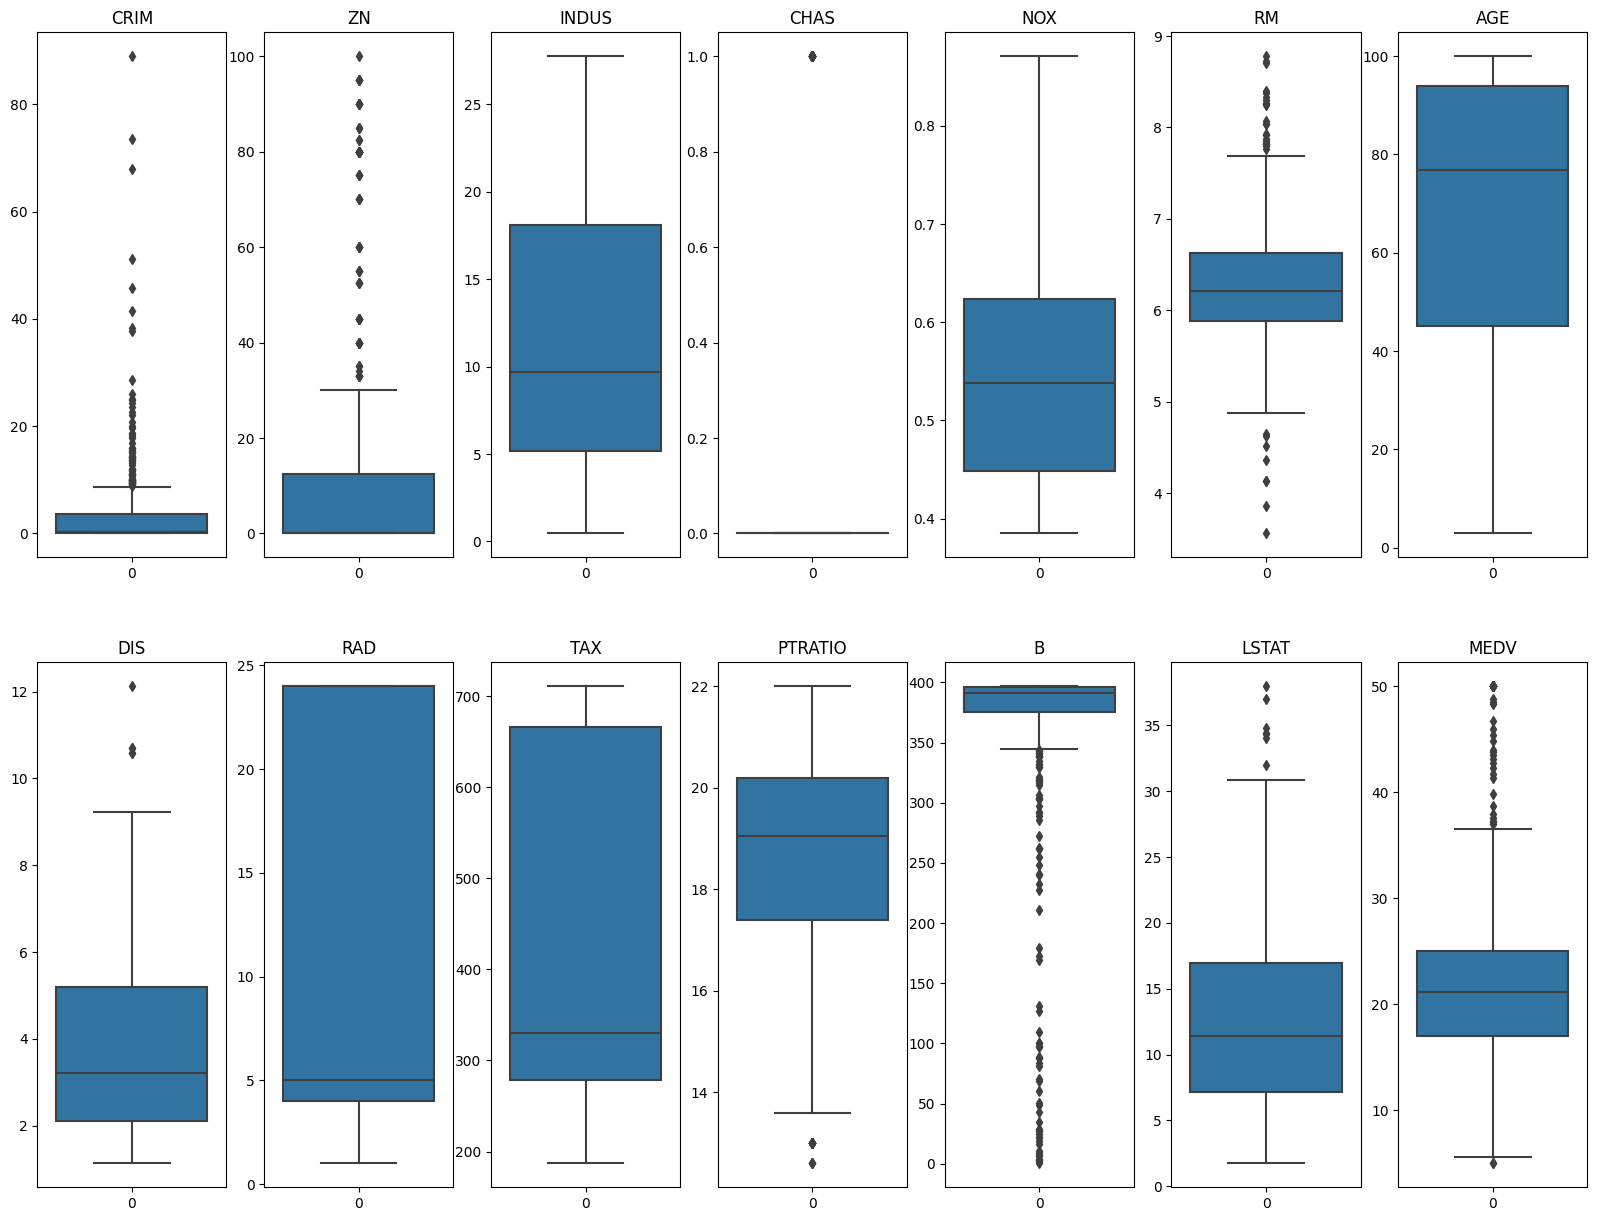

In [47]:
fig, axs=plt.subplots(ncols=7,nrows=2,figsize=(20,15))
index=0
axs=axs.flatten()
for k, v, in df.items():
    sns.boxplot(v, ax=axs[index])
    axs[index].set_title(k)
    index+=1

In [48]:
df=df[~(df['MEDV']>=35.0)]

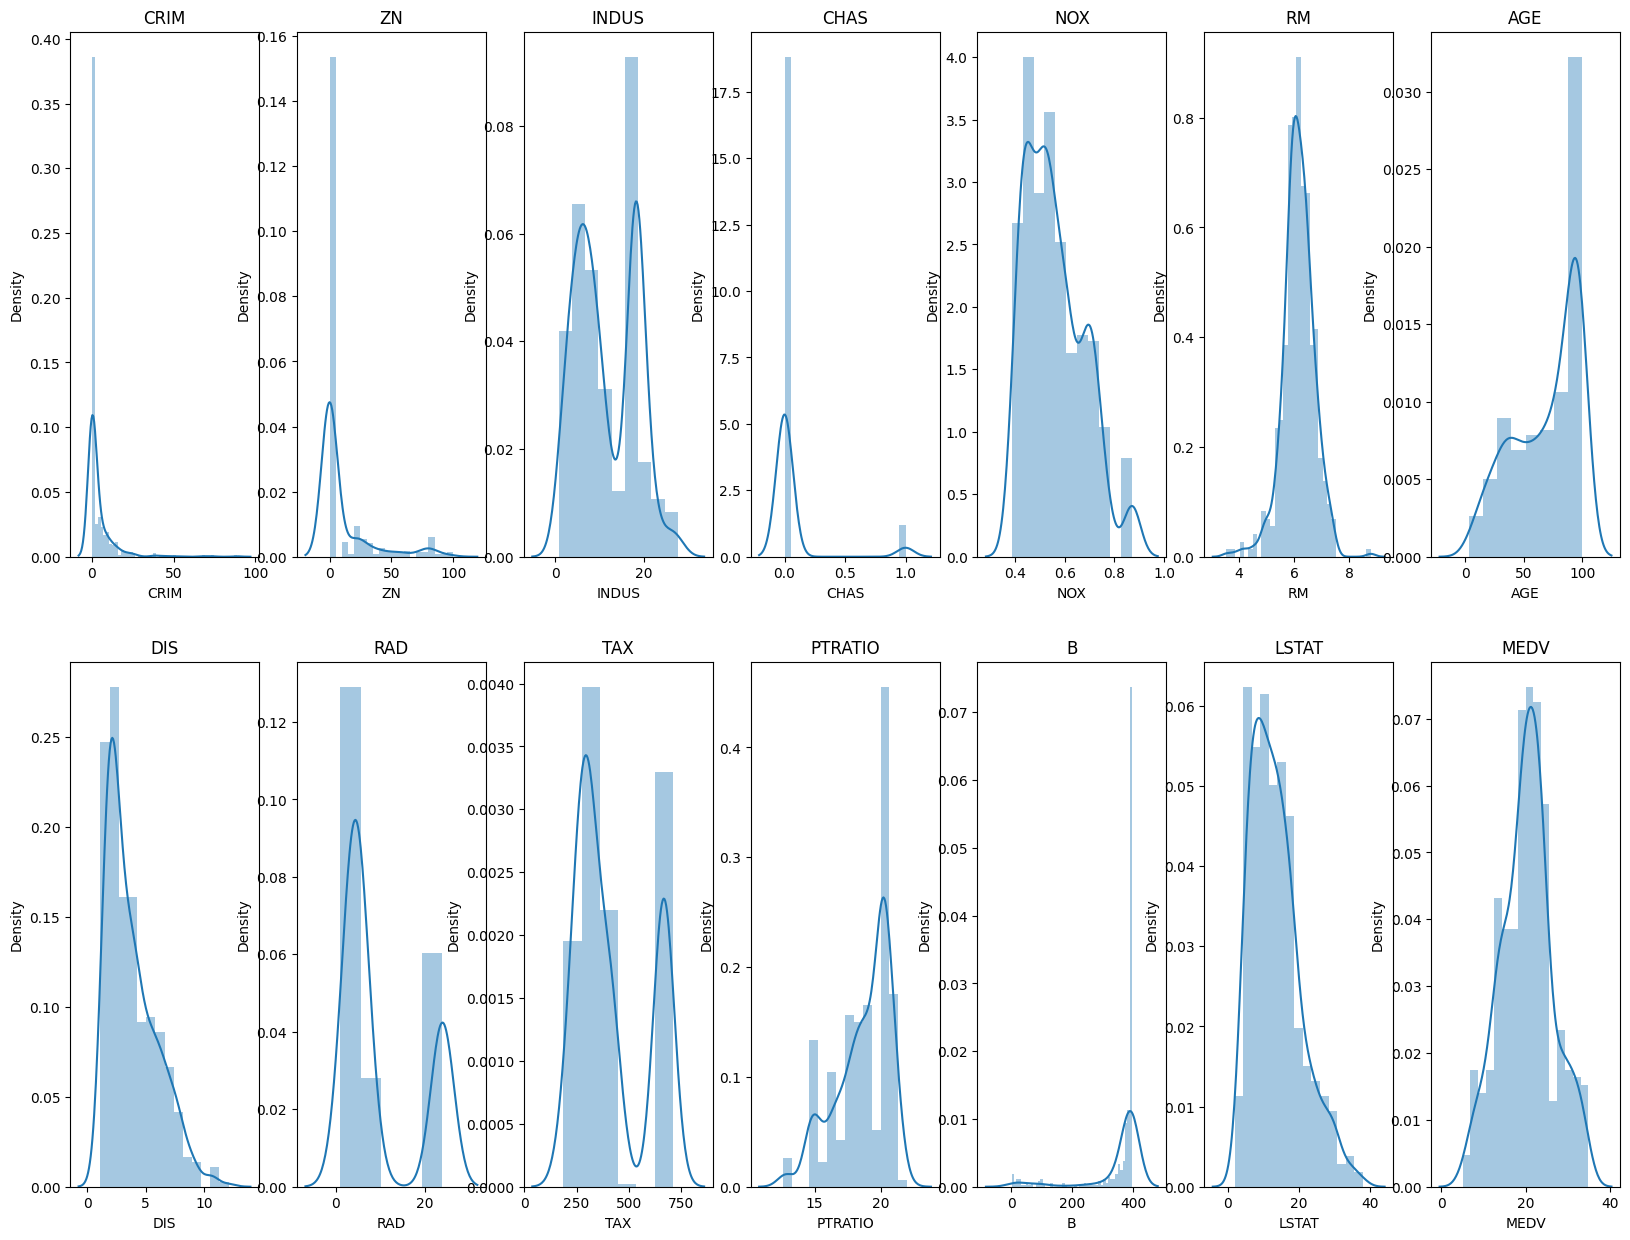

In [49]:
fig, axs=plt.subplots(ncols=7,nrows=2,figsize=(20,15))
index=0
axs=axs.flatten()
for k, v, in df.items():
    sns.distplot(v, ax=axs[index])
    axs[index].set_title(k)
    index+=1

<Axes: >

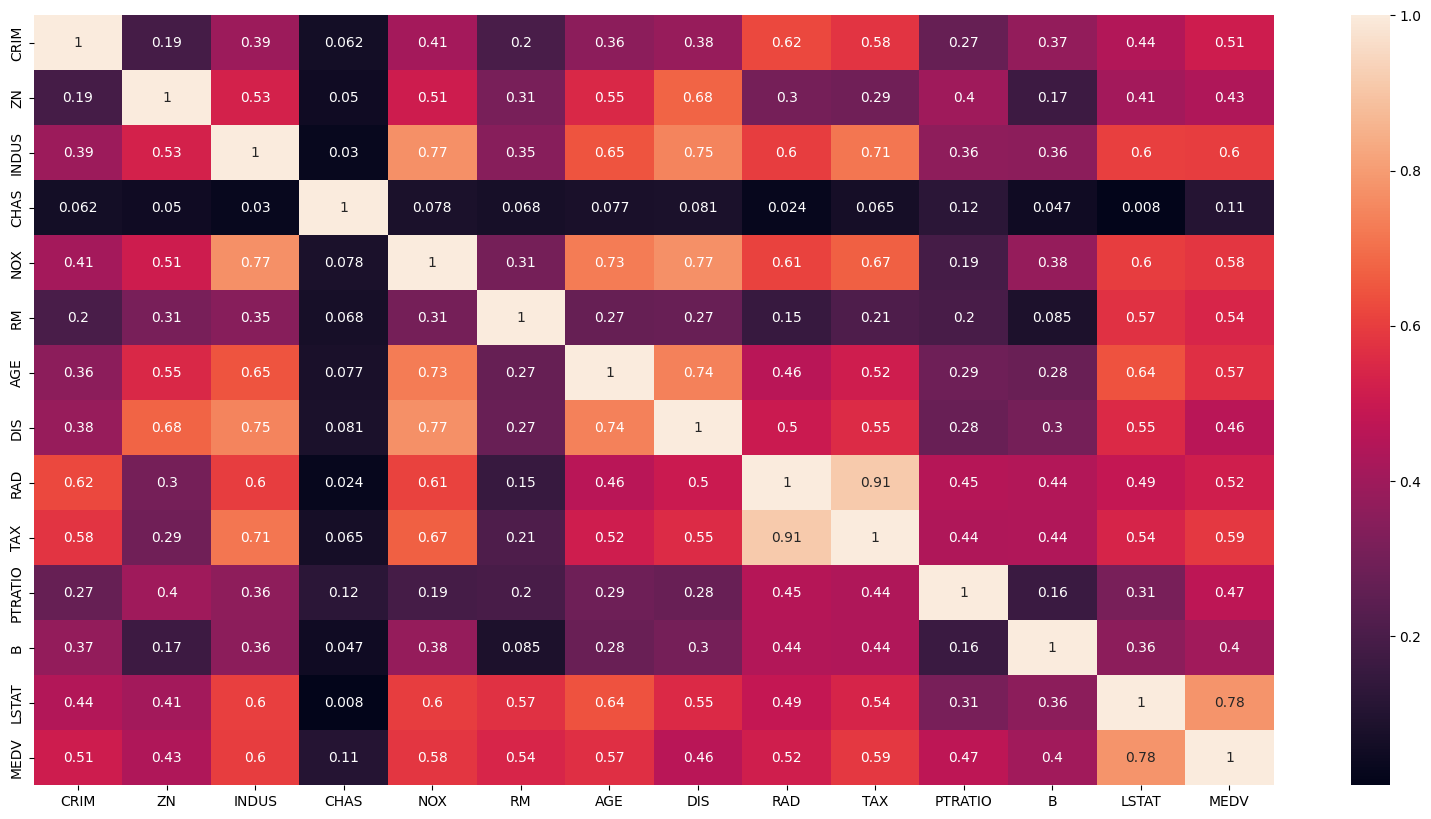

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

In [51]:
scaler=preprocessing.MinMaxScaler()
cols=df.columns
df=scaler.fit_transform(df)
df=pd.DataFrame(df, columns=cols)

In [53]:
for i in df:
    df[i]=df[i].fillna(df[i].mean())
df

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.058148   0.0  0.314815  0.577505  0.641607  0.268711   
1    0.000236  0.00  0.234444   0.0  0.172840  0.547998  0.782698  0.348524   
2    0.000236  0.00  0.234444   0.0  0.172840  0.694386  0.599382  0.348524   
3    0.000293  0.00  0.053333   0.0  0.150206  0.658555  0.441813  0.448173   
4    0.000264  0.00  0.053333   0.0  0.150206  0.549722  0.574665  0.448173   
..        ...   ...       ...   ...       ...       ...       ...       ...   
453  0.000633  0.00  0.414444   0.0  0.386831  0.580954  0.681771  0.122080   
454  0.000438  0.00  0.414444   0.0  0.386831  0.490324  0.760041  0.104691   
455  0.000612  0.00  0.414444   0.0  0.386831  0.654340  0.907312  0.093771   
456  0.001161  0.00  0.414444   0.0  0.386831  0.619467  0.889804  0.113918   
457  0.000462  0.00  0.414444   0.0  0.386831  0.473079  0.682715  0.124482   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.000000  0.208015  0.287234  1.000000  0.083356  0.635452  
1    0.043478  0.104962  0.553191  1.000000  0.198944  0.555184  
2    0.043478  0.104962  0.553191  0.989737  0.056960  0.993311  
3    0.086957  0.066794  0.648936  0.994276  0.026674  0.949833  
4    0.086957  0.066794  0.648936  0.992990  0.089747  0.792642  
..        ...       ...       ...       ...       ...       ...  
453  0.000000  0.164122  0.893617  0.987619  0.321026  0.581940  
454  0.000000  0.164122  0.893617  1.000000  0.197277  0.521739  
455  0.000000  0.164122  0.893617  1.000000  0.101695  0.632107  
456  0.000000  0.164122  0.893617  0.991301  0.125035  0.568562  
457  0.000000  0.164122  0.893617  1.000000  0.163934  0.230769  

[458 rows x 14 columns]

In [54]:
df.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [55]:
x=df[['LSTAT', 'RM']]
y=df['MEDV']

In [57]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2, random_state=47)

In [59]:
linmodel=LinearRegression()
linmodel.fit(xtrain, ytrain)

LinearRegression()

In [61]:
ypred=linmodel.predict(xtest)
ypred

array([0.48745999, 0.49791245, 0.42205708, 0.72503989, 0.01953347,
       0.57345041, 0.47190411, 0.42050719, 0.27962225, 0.62029669,
       0.71108626, 0.46453899, 0.5293557 , 0.70365661, 0.30159194,
       0.65003433, 0.38082202, 0.67744568, 0.57909752, 0.39305045,
       0.26333928, 0.22008221, 0.40912797, 0.69421008, 0.43751932,
       0.57730179, 0.51697402, 0.53426852, 0.41708774, 0.50096209,
       0.48399163, 0.76041535, 0.80109679, 0.57461643, 0.52593068,
       0.49996625, 0.46815588, 0.32071866, 0.57721639, 0.77017355,
       0.34170244, 0.60333511, 0.54172747, 0.55603215, 0.56652506,
       0.29977557, 0.58620955, 0.66220767, 0.57563104, 0.31196994,
       0.5459033 , 0.12301661, 0.63820648, 0.74751245, 0.50420065,
       0.51703344, 0.46277604, 0.52931034, 0.67944915, 0.53029957,
       0.51886972, 0.51112063, 0.38299356, 0.40211743, 0.47920692,
       0.72827   , 0.66760955, 0.50877954, 0.55067535, 0.43602244,
       0.62087401, 0.58006553, 0.12895725, 0.42248362, 0.66788

In [70]:
linmodel.score(xtest, ypred)*100

100.0

In [68]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
ytrainpred = linmodel.predict(xtrain)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrainpred)))
r2 = r2_score(ytrain, ytrainpred)
mae=mean_absolute_error(ytrain, ytrainpred)
mse=mean_squared_error(ytrain, ytrainpred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('MAE score is {}'.format(mae))
print('MSE score is {}'.format(mse))
print("\n")

# model evaluation for testing set
ytestpred = linmodel.predict(xtest)
rmse = (np.sqrt(mean_squared_error(ytest, ytestpred)))
r2 = r2_score(ytest, ytestpred)
mae=mean_absolute_error(ytest, ytestpred)
mse=mean_squared_error(ytest, ytestpred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('MAE score is {}'.format(mae))
print('MSE score is {}'.format(mse))

The model performance for training set
--------------------------------------
RMSE is 0.13030834000220315
R2 score is 0.5942198440160047
MAE score is 0.10101029827942472
MSE score is 0.016980263474129776


The model performance for testing set
--------------------------------------
RMSE is 0.1297782384990637
R2 score is 0.6116429777041769
MAE score is 0.10148760631601138
MSE score is 0.01684239118791986
